In [1]:
import xupy as xp
import matplotlib.pyplot as plt


[XuPy] Device 0 available - GPU : `NVIDIA GeForce RTX 4060 Laptop GPU`
       Memory = 7805.56 MB | Compute Capability = 8.9
       Using CuPy 13.5.1 for acceleration.


In [2]:
fs = 1000
T = 1/fs
Td = 2*T

In [ ]:
om = lambda f: 2*xp.pi*f
OLTF = lambda G,T,Td,f: G*T/om(f) * (xp.sinc(om(f)*T/2))**2 * xp.exp(-1j*om(f)*Td-1j*xp.pi/2)
ERRTF = lambda G,T,Td,f: 1.0/(1.0+OLTF(G,T,Td,f))

In [4]:
def plot_tf(tf,freq):
    amp = xp.abs(tf)
    ang = xp.unwrap(xp.angle(tf))

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(amp))
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    # plt.ylim([1e-8,1e-2])

    plt.subplot(2,1,2)
    plt.plot(xp.asnumpy(freq),xp.asnumpy(ang*180/xp.pi))
    plt.grid()
    plt.xscale('log')
    # plt.ylim([-270,0])
    # plt.yticks([0,-90,-180,-270])

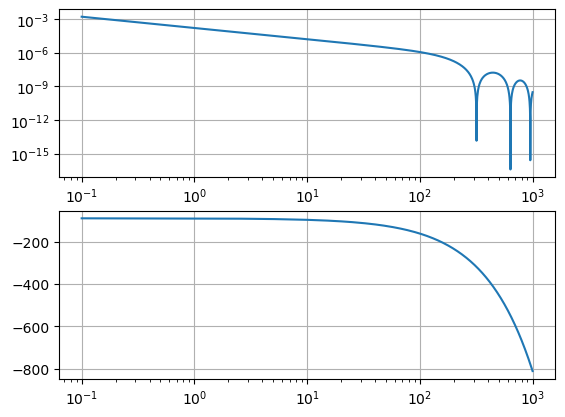

In [5]:
freq = xp.linspace(0.1,1000,400)

G = 1

tf = OLTF(G,T,Td,freq)
plot_tf(tf,freq)

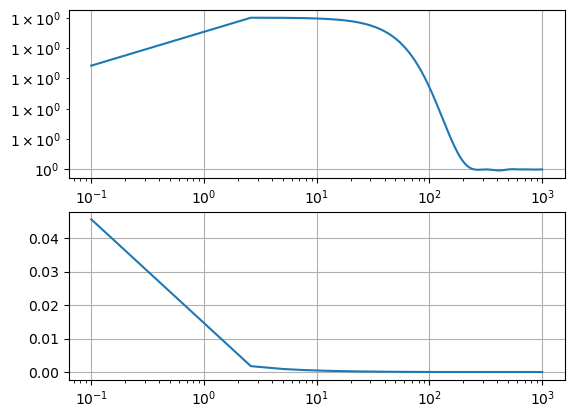

In [7]:
tf = ERRTF(0.5,T,Td,freq)
plot_tf(tf,freq)